In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
######################################################################
# CartPole ( https://www.gymlibrary.dev/environments/classic_control/cart_pole/ )
#=====================================================================
env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset()
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

In [3]:
# minimum and maximum of [cart_position, cart_velocity, pole_angle, pole_angular_velocity]
env.observation_space 

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [4]:
observation_dim = env.observation_space.shape
observation_dim

(4,)

In [5]:
if isinstance(env.observation_space, gym.spaces.Discrete): # dicrete observation space
    observation_dim = env.observation.n
elif isinstance(env.observation_space, gym.spaces.Box): # continuous observation space
    observation_dim = env.observation_space.shape[0]
observation_dim

4

In [6]:
env.action_space # 0 or 1

Discrete(2)

In [7]:
action_dim = env.action_space.n
action_dim

2

In [8]:
if isinstance(env.action_space, gym.spaces.Discrete): # dicrete action space
    action_dim = env.action_space.n
elif isinstance(env.action_space, gym.spaces.Box): # continuous action space
    action_dim = env.action_space.shape[0]
action_dim

2

In [9]:
env.action_space.sample() # random action

0

In [10]:
# take a random action
observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
observation, reward, terminated, truncated, info

(array([ 0.00927443, -0.22594513, -0.03789565,  0.30665243], dtype=float32),
 1.0,
 False,
 False,
 {})

In [11]:
env_screen = env.render() # numpy.ndarray
env_screen.shape

(400, 600, 3)

In [12]:
env_screen

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [13]:
import gym
import numpy as np

# iteration
env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset()

total_reward = 0.0
terminated = False
env_screens = []
while not terminated:
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    env_screen = env.render() # numpy.ndarray
    env_screens.append(env_screen)
    total_reward += reward

env.close()
total_reward

37.0

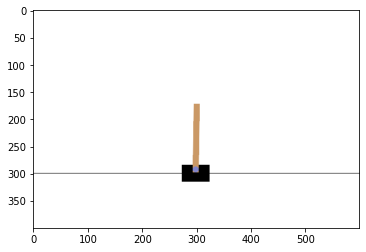

In [14]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

####################################################
# create an animation
#===================================================

fig, ax = plt.subplots()
im = ax.imshow(env_screens[0])

def update(i):
    im.set_data(env_screens[i])
    return (im)

animation = FuncAnimation(fig=fig, func=update, frames=len(env_screens), interval=100)
#plt.show()

# display the animation in the notebook
HTML(animation.to_jshtml())

In [15]:
#################################################################
# compute the expected reward if we always take random actions
#################################################################

import gym
import numpy as np

env = gym.make("CartPole-v1", render_mode="rgb_array")
NUM_EPISODES = 1000
rewards = np.zeros(NUM_EPISODES)

for episode in range(NUM_EPISODES):
    env.reset()
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    total_reward = reward
    while not terminated:
        # take a random action
        action = env.action_space.sample()
        next_observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
    rewards[episode] = total_reward
env.close()

rewards.mean() # expected reward is about 22

22.562

In [16]:
# observation
env.reset()
observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
cart_position, cart_velocity, pole_angle, pole_angular_velocity = observation

# 4 values of a state
print(cart_position, cart_velocity, pole_angle, pole_angular_velocity)

int_arr = (observation > 0).astype('int')
int_arr

0.033554904 -0.18715076 0.049509652 0.33018646


array([1, 0, 1, 1])